In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import danish
import batoid
import galsim
import os
import yaml

In [16]:
telescope = batoid.Optic.fromYaml("AuxTel.yaml")
extra = telescope.withGloballyShiftedOptic("M2", [0, 0, +0.0008])
intra = telescope.withGloballyShiftedOptic("M2", [0, 0, -0.0008])

obsc = yaml.safe_load(open(os.path.join(danish.datadir, "AuxTelObsc.yaml")))

In [17]:
factory = danish.DonutFactory(
    R_outer=0.635, R_inner=0.12,
    obsc_radii=obsc['radii'], obsc_motion=obsc['motion'], focal_length=20.8
)

In [18]:
def f(thx, thy, **kwargs):
    wavelength = 620e-9
    wf = batoid.wavefront(
        telescope,
        theta_x=np.deg2rad(thx),
        theta_y=np.deg2rad(thy),
        wavelength=wavelength,
        nx=256
    )
    intra_ab = batoid.zernikeTA(
        intra,
        theta_x=np.deg2rad(thx),
        theta_y=np.deg2rad(thy),
        wavelength=wavelength,
        eps=0.12 / 0.635,
        jmax=66,
        nrad=12,
        naz=72,
    )
    extra_ab = batoid.zernikeTA(
        extra,
        theta_x=np.deg2rad(thx),
        theta_y=np.deg2rad(thy),
        wavelength=wavelength,
        eps=0.12 / 0.635,
        jmax=66,
        nrad=12,
        naz=72,
    )

    fig, axes = plt.subplots(ncols=3, figsize=(22, 6))
    wfextent = (
        np.min(wf.coords[..., 0]),
        np.max(wf.coords[..., 0]),
        np.min(wf.coords[..., 1]),
        np.max(wf.coords[..., 1]),
    )
    a0 = axes[0].imshow(wf.array, extent=wfextent)
    a1 = axes[1].imshow(
        factory.image(
            aberrations=intra_ab*wavelength, 
            thx=np.deg2rad(thx), thy=np.deg2rad(thy)
        )
    )
    a2 = axes[2].imshow(
        factory.image(
            aberrations=extra_ab*wavelength, 
            thx=np.deg2rad(thx), thy=np.deg2rad(thy)
        )      
    )
    axes[0].set_title("wavefront")
    axes[1].set_title("intrafocal donut")
    axes[2].set_title("extrafocal donut")
    
    plt.show()
    return None

/astro/store/epyc/users/jfc20/local/mambaforge/envs/auxtel_aos/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/astro/store/epyc/users/jfc20/local/mambaforge/envs/auxtel_aos/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astro/store/epyc/users/jfc20/local/mambaforge/envs/auxtel_aos/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/astro/store/epyc/users/jfc20/local/mambaforge/envs/auxtel_aos/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/astro/store/epyc/users/jfc20/local/mambaforge/envs/auxtel_aos/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: inval

GalSimRangeError: Invalid obscuration. Value nan not in range [0.0, 1.0]

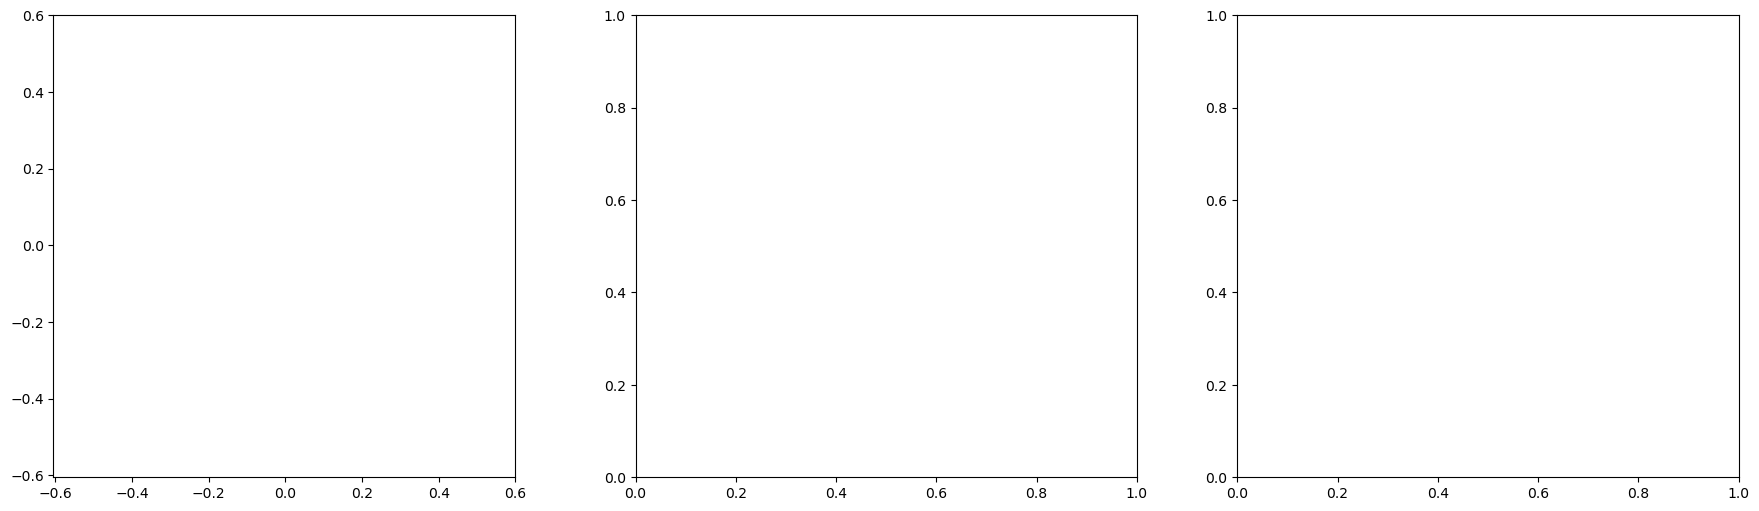

In [19]:
thx = ipywidgets.FloatText(
    value=1.187, step=0.01, 
    min=-1.9, max=1.9, 
    description='field x (deg)',
    layout={'width':'150px'}
)
thy = ipywidgets.FloatText(
    value=1.187, step=0.01, 
    min=-1.9, max=1.9, 
    description='field y (deg)',
    layout={'width':'150px'}
)

all_widgets = dict(thx=thx, thy=thy)
output = ipywidgets.interactive_output(f, all_widgets)
ipywidgets.VBox([
    ipywidgets.HBox([
        ipywidgets.VBox([thx, thy]),
    ]),
    output
])